<a href="https://colab.research.google.com/github/Rick279a/Intelig-ncia-Artificial-I/blob/main/AlgoritmoTreinamentoReconhecimentoImagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algoritmo para reconhecimento de imagens de números de 0 a 9

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Carregar o conjunto de dados MNIST (Imagens com Dados de 0 a 9)
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalizar os valores dos pixels para o intervalo [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Adicionar uma dimensão para os canais de cor (preto e branco neste caso)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Definir o modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinnar o modelo
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/5
938/938 [==============================] - 58s 61ms/step - loss: 0.1897 - accuracy: 0.9402 - val_loss: 0.0456 - val_accuracy: 0.9857
Epoch 2/5
938/938 [==============================] - 50s 54ms/step - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0406 - val_accuracy: 0.9869
Epoch 3/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0346 - val_accuracy: 0.9897
Epoch 4/5
938/938 [==============================] - 51s 55ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0280 - val_accuracy: 0.9905
Epoch 5/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0295 - val_accuracy: 0.9919


#Avaliação da precisão do algoritmo:

In [10]:
# Avaliar do modelo nos dados de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'A perda nos dados de teste: {test_loss}')
print(f'A precisão nos dados de teste: {test_accuracy}')


313/313 [==============================] - 3s 9ms/step - loss: 0.0295 - accuracy: 0.9919
A perda nos dados de teste: 0.02949817292392254
A precisão nos dados de teste: 0.9919000267982483


#Testar o algoritmo com imagens aleatórias

In [20]:
import numpy as np

new_image = np.random.rand(28, 28)
new_label = 5

test_images = np.concatenate((test_images, new_image.reshape(1, 28, 28, 1)), axis=0)
test_labels = np.concatenate((test_labels, [new_label]), axis=0)

# Selecionar algumas imagens específicas para avaliar
images_to_evaluate = test_images[:15]
labels_to_evaluate = test_labels[:15]

# Previsões para essas imagens
predictions = model.predict(images_to_evaluate)

# Converter as previsões de volta para rótulos de classe
predicted_labels = np.argmax(predictions, axis=1)

# Exibir as previsões e os rótulos verdadeiros
for i in range(len(images_to_evaluate)):
    print(f'Imagem {i+1}:')
    print(f'  Rótulo verdadeiro: {labels_to_evaluate[i]}')
    print(f'  Rótulo previsto: {predicted_labels[i]}')


1/1 [==============================] - 0s 38ms/step
Imagem 1:
  Rótulo verdadeiro: 7
  Rótulo previsto: 7
Imagem 2:
  Rótulo verdadeiro: 2
  Rótulo previsto: 2
Imagem 3:
  Rótulo verdadeiro: 1
  Rótulo previsto: 1
Imagem 4:
  Rótulo verdadeiro: 0
  Rótulo previsto: 0
Imagem 5:
  Rótulo verdadeiro: 4
  Rótulo previsto: 4
Imagem 6:
  Rótulo verdadeiro: 1
  Rótulo previsto: 1
Imagem 7:
  Rótulo verdadeiro: 4
  Rótulo previsto: 4
Imagem 8:
  Rótulo verdadeiro: 9
  Rótulo previsto: 9
Imagem 9:
  Rótulo verdadeiro: 5
  Rótulo previsto: 5
Imagem 10:
  Rótulo verdadeiro: 9
  Rótulo previsto: 9
Imagem 11:
  Rótulo verdadeiro: 0
  Rótulo previsto: 0
Imagem 12:
  Rótulo verdadeiro: 6
  Rótulo previsto: 6
Imagem 13:
  Rótulo verdadeiro: 9
  Rótulo previsto: 9
Imagem 14:
  Rótulo verdadeiro: 0
  Rótulo previsto: 0
Imagem 15:
  Rótulo verdadeiro: 1
  Rótulo previsto: 1


#Mostar os dados existentes na biblioteca:

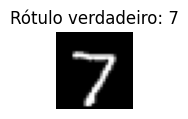

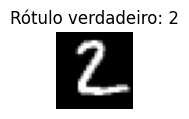

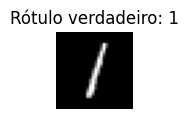

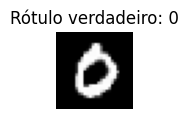

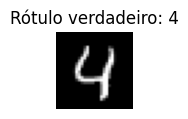

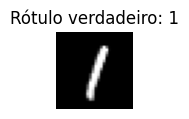

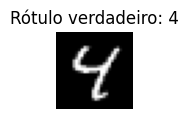

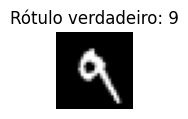

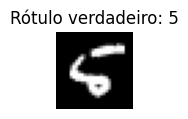

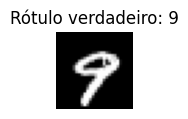

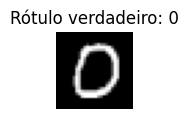

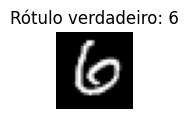

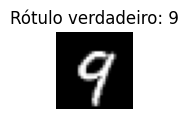

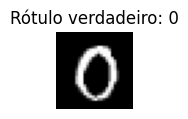

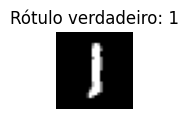

In [21]:
import matplotlib.pyplot as plt

# Exibir as primeiras 10 imagens do conjunto de teste
for i in range(15):
    plt.figure(figsize=(1,1))
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Rótulo verdadeiro: {test_labels[i]}')
    plt.axis('off')
    plt.show()
